<a href="https://colab.research.google.com/github/gitHasty-0321/DS-Unit-1-Sprint-2-Statistics/blob/master/Steven_Hastings_DSPT5__LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-02-01 00:57:02--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-02-01 00:57:03 (135 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import style
from scipy.stats import ttest_1samp, ttest_ind, stats, chi2, chi2_contingency,chisquare, normaltest,t
import matplotlib.pyplot as plt
%matplotlib inline

votes = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                 header=None,
                 names=['party','handicapped-infants',
                        'water-project',
                        'budget',
                        'physician-fee-freeze',
                        'el-salvador-aid','religious-groups',
                        'anti-satellite-test-ban','aid-to-nicaragua',
                        'mx-missile','immigration',
                        'corp-cutback','education',
                        'right-to-sue','crime',
                        'duty-free',
                        'south-africa'],na_values="?")

In [0]:
votes = votes.replace({'n':0, 'y':1})

In [46]:
print(votes.shape)
votes.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-test-ban,aid-to-nicaragua,mx-missile,immigration,corp-cutback,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [47]:
votes.party.value_counts()

democrat      267
republican    168
Name: party, dtype: int64

In [48]:
republicans = votes[votes.party == 'republican']
democrats = votes[votes.party == 'democrat']
print(republicans.shape,democrats.shape)

(168, 17) (267, 17)


In [49]:
republicans.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-test-ban,aid-to-nicaragua,mx-missile,immigration,corp-cutback,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


In [50]:
democrats.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-test-ban,aid-to-nicaragua,mx-missile,immigration,corp-cutback,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


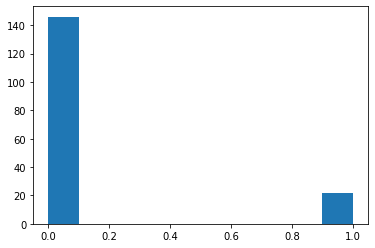

In [51]:
republicans.budget.bfill(inplace=True)
plt.hist(republicans.budget);

In [52]:
republicans.budget.head()

0     0.0
1     0.0
7     0.0
8     0.0
10    0.0
Name: budget, dtype: float64

In [53]:
rep_budget = pd.DataFrame(republicans.budget)
rep_budget.head()

,budget
0,0.0
1,0.0
7,0.0
8,0.0
10,0.0


In [62]:
rep_budget.describe()

,budget
count,168.000000
mean,0.130952
std,0.338357
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [0]:
def confidence_interval(data, confidence=0.95):
  '''
  calculate a 95% confidence interval for list/array of data input. 
  '''
  data_series = np.array(data)
  mean = np.mean(data)
  n = len(data)
  std_error = np.std(data, ddof=1)/np.sqrt(n)
  margin_of_error = std_error * t.ppf((1 + confidence)/2.0, n - 1)
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [61]:
confidence_interval(republicans.budget)
# the mean of the sample for republicans['budget'] is .13 and I am 95% confident
## that the mean of the population is somewhere between .079 and .182
### around 8% of sampled republicans voted yes on the budget bill


(0.13095238095238096, 0.0794144466238523, 0.18249031528090962)

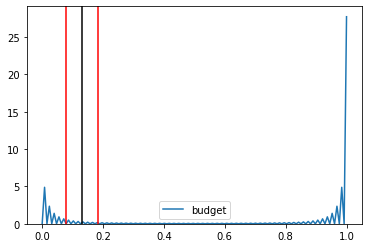

In [64]:
sns.kdeplot(republicans.budget)
CI = confidence_interval(republicans.budget)
plt.axvline(x=CI[1], color='r')
plt.axvline(x=CI[2], color='r')
plt.axvline(x=CI[0], color='k');
  # the black line represents the sample mean 
  ## and i am 95% confident that the population mean 
  ### falls within the range of the red lines

In [78]:
dem_budget_mean = np.mean(democrats.budget)
dem_budget_mean

0.8884615384615384

In [81]:
democrats.budget.shape
len(democrats.budget)

267

In [68]:
ttest_1samp(democrats.budget, .89, nan_policy='omit')

Ttest_1sampResult(statistic=-0.07865111512328564, pvalue=0.9373708601919184)

In [76]:
t.ppf(.93737,df=266)

1.5379070454221395

In [0]:
dem_budget_tstat = 1.5379070454221395
dem_budget_pvalue = 0.9373708601919184

In [0]:
uppertail_95percent_confidence_interval = np.mean(democrats.budget) + (1.96 * (np.std(democrats.budget)/np.sqrt(len(democrats.budget))))
lowertail_95percent_confidence_interval = np.mean(democrats.budget) - (1.96 * (np.std(democrats.budget)/np.sqrt(len(democrats.budget))))

In [85]:
uppertail_95percent_confidence_interval

0.926221546805961

In [86]:
lowertail_95percent_confidence_interval

0.8507015301171158

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


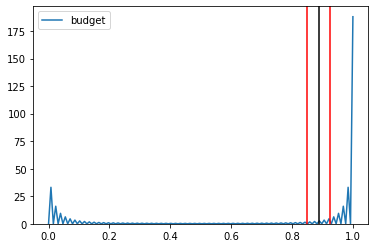

In [90]:
sns.kdeplot(democrats.budget);
plt.axvline(x=uppertail_95percent_confidence_interval, color='r')
plt.axvline(x=lowertail_95percent_confidence_interval, color='r')
plt.axvline(x=np.mean(democrats.budget), color='k')
plt.show()

In [96]:
republicans.crime.bfill(inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [0]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    def bootstrap_replicate_1d(data, func):
        return func(np.random.choice(data, size=len(data)))
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [0]:
rep_crime_reps = draw_bs_reps(republicans.crime,np.mean,size=1000)

In [104]:
np.mean(republicans.crime)

0.9821428571428571

In [101]:
np.mean(rep_crime_reps)

0.9820714285714285

In [105]:
np.std(rep_crime_reps)

0.010226765602764042

In [0]:
uppertail_rep_crime_reps = np.mean(rep_crime_reps) + (1.96 * (np.std(rep_crime_reps)/np.sqrt(len(rep_crime_reps))))
lowertail_rep_crime_reps = np.mean(rep_crime_reps) - (1.96 * (np.std(rep_crime_reps)/np.sqrt(len(rep_crime_reps))))

In [110]:
uppertail_rep_crime_reps

0.9827052900704959

In [111]:
lowertail_rep_crime_reps

0.9814375670723611

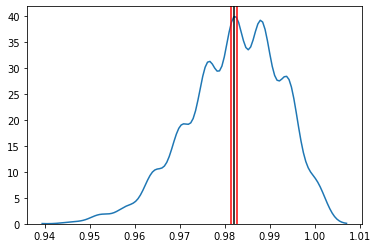

In [113]:
sns.kdeplot(rep_crime_reps)
plt.axvline(x=uppertail_rep_crime_reps, color='r')
plt.axvline(x=lowertail_rep_crime_reps, color='r')
plt.axvline(x=np.mean(rep_crime_reps), color='k')
plt.show()

In [0]:
def plot_confidence_interval(data, confidence=0.95):
    sns.kdeplot(data)
    CI = confidence_interval(data, confidence)
    plt.axvline(x=CI[0], color='red')
    plt.axvline(x=CI[1], color='k')
    plt.axvline(x=CI[2], color='red')
    plt.show()

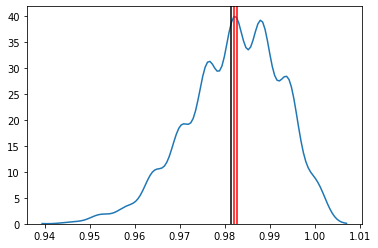

In [115]:
plot_confidence_interval(rep_crime_reps,confidence=0.95)

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

In [116]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")

print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
?pd.cut

In [119]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [120]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [184]:
df['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [185]:
df.isnull().sum()

age                      0
workclass             1836
fnlwgt                   0
education                0
education-num            0
marital-status           0
occupation            1843
relationship             0
race                     0
sex                      0
capital-gain             0
capital-loss             0
hours-per-week           0
country                583
salary                   0
capital-gain-cuts    30008
dtype: int64

In [211]:
cut_points = [0,100,1000,5000,10000,30000,50000]
# label_names = ['none', 'hundreds', 'low thousands', 'mid thousands','tens of thousands', '50k+']
df['capital-gain-cuts'] = pd.cut(df['capital-gain'], bins= 6)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,capital-gain-cuts
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(-99.999, 16666.5]"
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(-99.999, 16666.5]"
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(-99.999, 16666.5]"
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(-99.999, 16666.5]"
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(-99.999, 16666.5]"


In [212]:
df['capital-gain-cuts'].value_counts().sort_index()

(-99.999, 16666.5]    32306
(16666.5, 33333.0]       89
(33333.0, 49999.5]        7
(49999.5, 66666.0]        0
(66666.0, 83332.5]        0
(83332.5, 99999.0]      159
Name: capital-gain-cuts, dtype: int64

In [213]:
# crosstabs

sex_gains = pd.crosstab(df['sex'], df['capital-gain-cuts'],margins=True)
sex_gains

capital-gain-cuts,"(-99.999, 16666.5]","(16666.5, 33333.0]","(33333.0, 49999.5]","(83332.5, 99999.0]",All
sex,,,,,
Female,10728,19,2,22,10771
Male,21578,70,5,137,21790
All,32306,89,7,159,32561


In [214]:
female_gains = sex_gains.iloc[0][0:6].values
female_gains

array([10728,    19,     2,    22, 10771])

In [215]:
male_gains = sex_gains.iloc[1][0:6].values
male_gains

array([21578,    70,     5,   137, 21790])

In [0]:
row_sum = female_gains
col_sum = male_gains


In [287]:
row_sums

array(32306)

In [296]:
row_sums = sex_gains.iloc[0:2, 4].values
col_sums = sex_gains.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[10771 21790]
[32306    89     7   159 32561]


In [297]:
total = sex_gains.loc['All','All']
total

32561

In [298]:
df.shape

(32561, 16)

In [299]:
expected = []
for i in range(len(row_sums)):
    expected_row = []
    for column in col_sums:
        expected_val = column*row_sums[i]/total
        expected_row.append(expected_val)
    expected.append(expected_row)
    
expected = np.array(expected)
print(expected.shape)  
print(expected)

(2, 5)
[[1.06866474e+04 2.94407113e+01 2.31556156e+00 5.25963269e+01
  1.07710000e+04]
 [2.16193526e+04 5.95592887e+01 4.68443844e+00 1.06403673e+02
  2.17900000e+04]]


In [300]:
print(expected[0])
print(expected[1])

[1.06866474e+04 2.94407113e+01 2.31556156e+00 5.25963269e+01
 1.07710000e+04]
[2.16193526e+04 5.95592887e+01 4.68443844e+00 1.06403673e+02
 2.17900000e+04]


In [301]:
observed = pd.crosstab(df['sex'],df['salary']).values
observed

array([[ 9592,  1179],
       [15128,  6662]])

In [0]:
chi_squared, p_value, dof, expected = chi2_contingency(observed)

In [310]:
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 1517.813409134445
P-value: 0.0
Degrees of Freedom: 1
Expected: 
 [[ 8177.24025675  2593.75974325]
 [16542.75974325  5247.24025675]]


In [321]:
def pearson_r(x,y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
pearson_r(observed,expected)



0.9999999999999999

In [0]:
from scipy.stats import chi2_contingency

In [303]:
chi2_contingency(observed)

(1517.813409134445, 0.0, 1, array([[ 8177.24025675,  2593.75974325],
        [16542.75974325,  5247.24025675]]))

In [323]:
chi_squared_stat = ((observed - np.array(expected))**2/(np.array(expected))).sum()
chi_squared_stat

1518.8868199570722

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)